Part 1

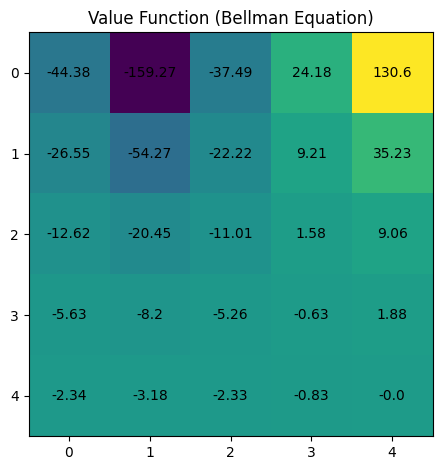

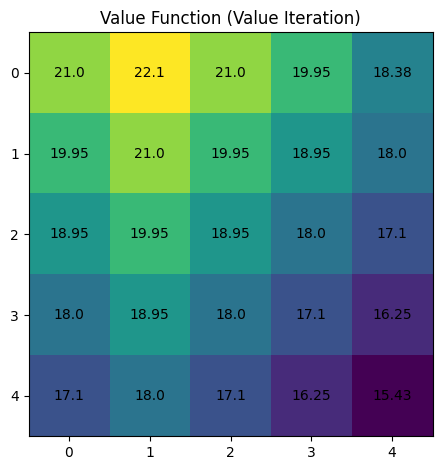

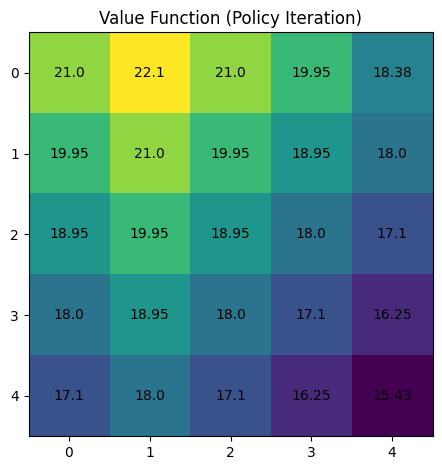

Optimal Policy (Value Iteration):
 [[[0. 0. 0. 1.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]]

 [[0. 0. 0. 1.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 0. 1.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]]

 [[0. 0. 0. 1.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]]

 [[0. 0. 0. 1.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]]]

Optimal Policy (Policy Iteration):
 [[[0. 0. 0. 1.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]]

 [[0. 0. 0. 1.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 0. 1.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]]

 [[0. 0. 0. 1.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]]

 [[0. 0. 0. 1.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

grid_size = 5
blue = (0, 1)
green = (0, 4)
red = (3, 2)
yellow = (4, 4)

rewards = np.zeros((grid_size, grid_size))
rewards[blue] = 5
rewards[green] = 2.5
gamma = 0.95
values = np.zeros((grid_size, grid_size))
policy = np.ones((grid_size, grid_size, 4)) * 0.25
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

def bellman(rewards, gamma):
    num_states = grid_size ** 2
    transition_matrix = np.eye(num_states)
    rewards_vector = rewards.flatten()

    for i in range(grid_size):
        for j in range(grid_size):
            current_state = i * grid_size + j
            if (i, j) == blue:
                transition_matrix[current_state, :] = 0
                transition_matrix[current_state, red[0] * grid_size + red[1]] = -gamma
                rewards_vector[current_state] = rewards[i, j]
            elif (i, j) == green:
                transition_matrix[current_state, :] = 0
                transition_matrix[current_state, red[0] * grid_size + red[1]] = -gamma * 0.5
                transition_matrix[current_state, yellow[0] * grid_size + yellow[1]] = -gamma * 0.5
                rewards_vector[current_state] = rewards[i, j]
            else:
                for action_idx, action in enumerate(actions):
                    ni, nj = i + action[0], j + action[1]
                    if 0 <= ni < grid_size and 0 <= nj < grid_size:
                        transition_matrix[current_state, ni * grid_size + nj] -= gamma * 0.25
                    else:
                        rewards_vector[current_state] -= 0.5 * 0.25

    values = np.linalg.solve(transition_matrix, rewards_vector)
    return values.reshape((grid_size, grid_size))

def policy_evaluation(policy, values, rewards, gamma, theta=1e-6):
    while True:
        delta = 0
        for i in range(grid_size):
            for j in range(grid_size):
                v = values[i, j]
                new_value = 0
                for action_idx, action in enumerate(actions):
                    ni, nj = i + action[0], j + action[1]
                    if 0 <= ni < grid_size and 0 <= nj < grid_size:
                        if (i, j) == blue:
                            new_value += policy[i, j, action_idx] * (rewards[i, j] + gamma * values[red])
                        elif (i, j) == green:
                            new_value += policy[i, j, action_idx] * (rewards[i, j] + gamma * 0.5 * (values[yellow] + values[red]))
                        else:
                            new_value += policy[i, j, action_idx] * (rewards[i, j] + gamma * values[ni, nj])
                    else:
                        new_value += policy[i, j, action_idx] * (-0.5 + gamma * values[i, j])
                values[i, j] = new_value
                delta = max(delta, abs(v - new_value))
        if delta < theta:
            break
    return values

def value_iteration(values, rewards, gamma, theta=1e-6):
    policy = np.zeros((grid_size, grid_size, 4))
    while True:
        delta = 0
        for i in range(grid_size):
            for j in range(grid_size):
                v = values[i, j]
                action_values = np.zeros(4)
                for action_idx, action in enumerate(actions):
                    ni, nj = i + action[0], j + action[1]
                    if 0 <= ni < grid_size and 0 <= nj < grid_size:
                        if (i, j) == blue:
                            action_values[action_idx] = rewards[i, j] + gamma * values[red]
                        elif (i, j) == green:
                            action_values[action_idx] = rewards[i, j] + gamma * 0.5 * (values[yellow] + values[red])
                        else:
                            action_values[action_idx] = rewards[i, j] + gamma * values[ni, nj]
                    else:
                        action_values[action_idx] = -0.5 + gamma * values[i, j]
                values[i, j] = np.max(action_values)
                delta = max(delta, abs(v - values[i, j]))
        if delta < theta:
            break
    for i in range(grid_size):
        for j in range(grid_size):
            action_values = np.zeros(4)
            for action_idx, action in enumerate(actions):
                ni, nj = i + action[0], j + action[1]
                if 0 <= ni < grid_size and 0 <= nj < grid_size:
                    if (i, j) == blue:
                        action_values[action_idx] = rewards[i, j] + gamma * values[red]
                    elif (i, j) == green:
                        action_values[action_idx] = rewards[i, j] + gamma * 0.5 * (values[yellow] + values[red])
                    else:
                        action_values[action_idx] = rewards[i, j] + gamma * values[ni, nj]
                else:
                    action_values[action_idx] = -0.5 + gamma * values[i, j]
            best_action = np.argmax(action_values)
            policy[i, j, best_action] = 1
    return values, policy

def policy_iteration(policy, rewards, gamma, theta=1e-6):
    values = np.zeros((grid_size, grid_size))
    while True:
        values = policy_evaluation(policy, values, rewards, gamma, theta)
        policy_stable = True
        for i in range(grid_size):
            for j in range(grid_size):
                old_action = np.argmax(policy[i, j])
                action_values = np.zeros(4)
                for action_idx, action in enumerate(actions):
                    ni, nj = i + action[0], j + action[1]
                    if 0 <= ni < grid_size and 0 <= nj < grid_size:
                        if (i, j) == blue:
                            action_values[action_idx] = rewards[i, j] + gamma * values[red]
                        elif (i, j) == green:
                            action_values[action_idx] = rewards[i, j] + gamma * 0.5 * (values[yellow] + values[red])
                        else:
                            action_values[action_idx] = rewards[i, j] + gamma * values[ni, nj]
                    else:
                        action_values[action_idx] = -0.5 + gamma * values[i, j]
                best_action = np.argmax(action_values)
                policy[i, j] = np.eye(4)[best_action]
                if old_action != best_action:
                    policy_stable = False
        if policy_stable:
            break
    return values, policy


values_bellman = bellman(rewards, gamma)
values_value_iter, optimal_policy = value_iteration(values.copy(), rewards, gamma)
values_policy_iter, optimal_policy_iter = policy_iteration(policy.copy(), rewards, gamma)

# Plotting functions
def plot_values(values, title):
    fig, ax = plt.subplots()
    im = ax.imshow(values, cmap='viridis')

    for i in range(grid_size):
        for j in range(grid_size):
            text = ax.text(j, i, round(values[i, j], 2),
                           ha="center", va="center", color="black")

    ax.set_title(title)
    fig.tight_layout()
    plt.show()

# Plotting the results
plot_values(values_bellman, "Value Function (Bellman Equation)")
plot_values(values_value_iter, "Value Function (Value Iteration)")
plot_values(values_policy_iter, "Value Function (Policy Iteration)")

# Display optimal policies
print("Optimal Policy (Value Iteration):\n", optimal_policy)
print("\nOptimal Policy (Policy Iteration):\n", optimal_policy_iter)


Part 2

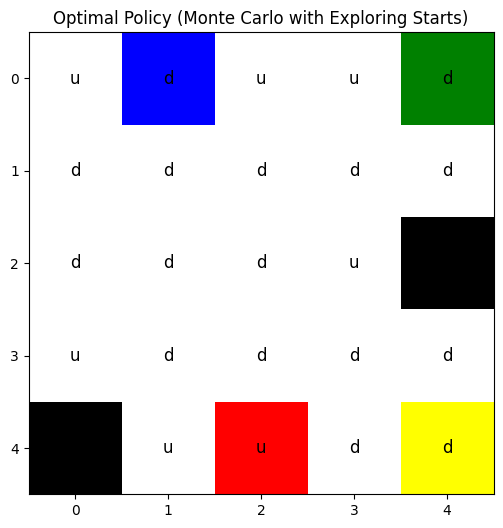

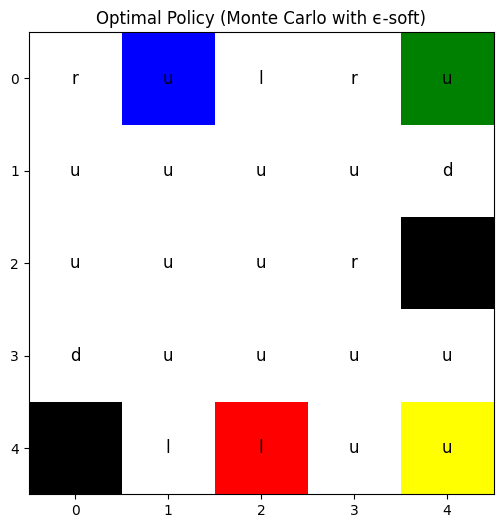

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

blue = (0, 1)
green = (0, 4)
black1 = (2, 4)
black2 = (4, 0)
red = (4, 2)
yellow = (4, 4)
terminal_states = [black1, black2]


gamma = 0.95
actions = ['up', 'down', 'left', 'right']
action_dict = {'up': (-1, 0), 'down': (1, 0), 'left': (0, -1), 'right': (0, 1)}

Q = {}
returns = {}

policy = {}
for i in range(5):
    for j in range(5):
        if (i, j) not in terminal_states:
            policy[(i, j)] = [0.25, 0.25, 0.25, 0.25]
            Q[(i, j)] = {a: 0 for a in actions}
            returns[(i, j)] = {a: [] for a in actions}

def generate_episode(policy):
    episode = []
    state = (np.random.randint(0, 5), np.random.randint(0, 5))
    while state in terminal_states or state == blue or state == green or state == red or state == yellow:
        state = (np.random.randint(0, 5), np.random.randint(0, 5))
    while state not in terminal_states:
        action = np.random.choice(actions, p=policy[state])
        new_state = (state[0] + action_dict[action][0], state[1] + action_dict[action][1])
        if new_state[0] < 0 or new_state[0] >= 5 or new_state[1] < 0 or new_state[1] >= 5:
            new_state = state
            reward = -0.5
        elif new_state == blue:
            reward = 5
            new_state = red
        elif new_state == green:
            reward = 2.5
            new_state = (red if np.random.rand() < 0.5 else yellow)
        elif new_state == red or new_state == yellow:
            reward = 0
        else:
            reward = -0.2
        episode.append((state, action, reward))
        state = new_state
    return episode

def mc_evaluation(policy, episodes=5000):
    for _ in range(episodes):
        episode = generate_episode(policy)
        G = 0
        for t in reversed(range(len(episode))):
            state, action, reward = episode[t]
            G = gamma * G + reward
            if not any([state == x[0] and action == x[1] for x in episode[:t]]):
                returns[state][action].append(G)
                Q[state][action] = np.mean(returns[state][action])

def mc_improvement(policy):
    for state in policy.keys():
        best_action = max(Q[state], key=Q[state].get)
        for action in actions:
            if action == best_action:
                policy[state][actions.index(action)] = 1 - 0.95
            else:
                policy[state][actions.index(action)] = 0.95 / 3

def generate_episode_e_soft(policy, epsilon=0.1):
    episode = []
    state = (np.random.randint(0, 5), np.random.randint(0, 5))
    while state in terminal_states or state == blue or state == green or state == red or state == yellow:
        state = (np.random.randint(0, 5), np.random.randint(0, 5))
    while state not in terminal_states:
        if np.random.rand() < epsilon:
            action = np.random.choice(actions)
        else:
            action = np.random.choice(actions, p=policy[state])
        new_state = (state[0] + action_dict[action][0], state[1] + action_dict[action][1])
        if new_state[0] < 0 or new_state[0] >= 5 or new_state[1] < 0 or new_state[1] >= 5:
            new_state = state
            reward = -0.5
        elif new_state == blue:
            reward = 5
            new_state = red
        elif new_state == green:
            reward = 2.5
            new_state = (red if np.random.rand() < 0.5 else yellow)
        elif new_state == red or new_state == yellow:
            reward = 0
        else:
            reward = -0.2
        episode.append((state, action, reward))
        state = new_state
    return episode

def mc_evaluation_e_soft(policy, episodes=5000, epsilon=0.1):
    for _ in range(episodes):
        episode = generate_episode_e_soft(policy, epsilon)
        G = 0
        for t in reversed(range(len(episode))):
            state, action, reward = episode[t]
            G = gamma * G + reward
            if not any([state == x[0] and action == x[1] for x in episode[:t]]):
                returns[state][action].append(G)
                Q[state][action] = np.mean(returns[state][action])

def mc_improvement_e_soft(policy, epsilon=0.1):
    for state in policy.keys():
        best_action = max(Q[state], key=Q[state].get)
        for action in actions:
            if action == best_action:
                policy[state][actions.index(action)] = 1 - epsilon + epsilon / len(actions)
            else:
                policy[state][actions.index(action)] = epsilon / len(actions)

def plot_policy(policy, title="Policy"):
    grid = np.zeros((5, 5), dtype=str)
    for state, probs in policy.items():
        action = np.argmax(probs)
        grid[state] = actions[action]
    plt.figure(figsize=(6, 6))
    for i in range(5):
        for j in range(5):
            plt.text(j, i, grid[i, j], ha='center', va='center', color='black', fontsize=12)
            if (i, j) == blue:
                plt.fill([j - 0.5, j + 0.5, j + 0.5, j - 0.5], [i - 0.5, i - 0.5, i + 0.5, i + 0.5], 'blue')
            elif (i, j) == green:
                plt.fill([j - 0.5, j + 0.5, j + 0.5, j - 0.5], [i - 0.5, i - 0.5, i + 0.5, i + 0.5], 'green')
            elif (i, j) == red:
                plt.fill([j - 0.5, j + 0.5, j + 0.5, j - 0.5], [i - 0.5, i - 0.5, i + 0.5, i + 0.5], 'red')
            elif (i, j) == yellow:
                plt.fill([j - 0.5, j + 0.5, j + 0.5, j - 0.5], [i - 0.5, i - 0.5, i + 0.5, i + 0.5], 'yellow')
            elif (i, j) in terminal_states:
                plt.fill([j - 0.5, j + 0.5, j + 0.5, j - 0.5], [i - 0.5, i - 0.5, i + 0.5, i + 0.5], 'black')
    plt.xlim(-0.5, 4.5)
    plt.ylim(4.5, -0.5)
    plt.title(title)
    plt.show()

mc_evaluation(policy)
mc_improvement(policy)
plot_policy(policy, "Optimal Policy (Monte Carlo with Exploring Starts)")

policy_e_soft = policy.copy()
mc_evaluation_e_soft(policy_e_soft)
mc_improvement_e_soft(policy_e_soft)
plot_policy(policy_e_soft, "Optimal Policy (Monte Carlo with ϵ-soft)")


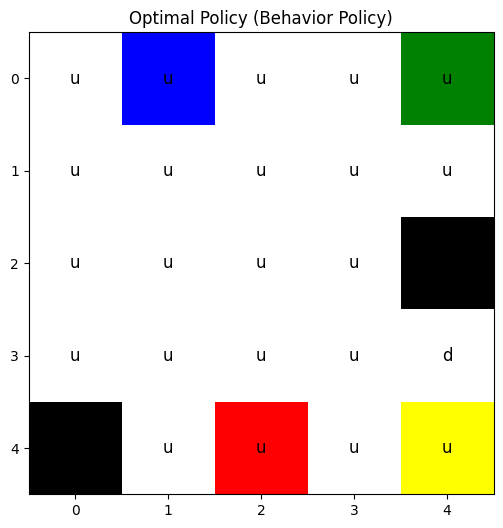

In [ ]:
# 2.2
import numpy as np
import matplotlib.pyplot as plt

blue = (0, 1)
green = (0, 4)
black1 = (2, 4)
black2 = (4, 0)
red = (4, 2)
yellow = (4, 4)
terminal_states = [black1, black2]

gamma = 0.95
actions = ['up', 'down', 'left', 'right']
action_dict = {'up': (-1, 0), 'down': (1, 0), 'left': (0, -1), 'right': (0, 1)}

Q = {}
C = {}

policy = {}
behavior_policy = {}
for i in range(5):
    for j in range(5):
        if (i, j) not in terminal_states:
            policy[(i, j)] = [0.25, 0.25, 0.25, 0.25]
            behavior_policy[(i, j)] = [0.25, 0.25, 0.25, 0.25]
            Q[(i, j)] = {a: 0 for a in actions}
            C[(i, j)] = {a: 0 for a in actions}

def generate_episode(policy):
    episode = []
    state = (np.random.randint(0, 5), np.random.randint(0, 5))
    while state in terminal_states or state == blue or state == green or state == red or state == yellow:
        state = (np.random.randint(0, 5), np.random.randint(0, 5))
    while state not in terminal_states:
        action = np.random.choice(actions, p=policy[state])
        new_state = (state[0] + action_dict[action][0], state[1] + action_dict[action][1])
        if new_state[0] < 0 or new_state[0] >= 5 or new_state[1] < 0 or new_state[1] >= 5:
            new_state = state
            reward = -0.5
        elif new_state == blue:
            reward = 5
            new_state = red
        elif new_state == green:
            reward = 2.5
            new_state = (red if np.random.rand() < 0.5 else yellow)
        elif new_state == red or new_state == yellow:
            reward = 0
        else:
            reward = -0.2
        episode.append((state, action, reward))
        state = new_state
    return episode

def mc_evaluation_behaviour_policy(policy, behavior_policy, episodes=5000):
    for _ in range(episodes):
        episode = generate_episode(behavior_policy)
        G = 0
        W = 1
        for t in reversed(range(len(episode))):
            state, action, reward = episode[t]
            G = gamma * G + reward
            C[state][action] += W
            Q[state][action] += (W / C[state][action]) * (G - Q[state][action])
            policy[state] = np.eye(len(actions))[np.argmax([Q[state][a] for a in actions])]
            if action != np.argmax(policy[state]):
                break
            W /= behavior_policy[state][actions.index(action)]

def plot_policy(policy, title="Policy"):
    grid = np.zeros((5, 5), dtype=str)
    for state, probs in policy.items():
        action = np.argmax(probs)
        grid[state] = actions[action]
    plt.figure(figsize=(6, 6))
    for i in range(5):
        for j in range(5):
            plt.text(j, i, grid[i, j], ha='center', va='center', color='black', fontsize=12)
            if (i, j) == blue:
                plt.fill([j - 0.5, j + 0.5, j + 0.5, j - 0.5], [i - 0.5, i - 0.5, i + 0.5, i + 0.5], 'blue')
            elif (i, j) == green:
                plt.fill([j - 0.5, j + 0.5, j + 0.5, j - 0.5], [i - 0.5, i - 0.5, i + 0.5, i + 0.5], 'green')
            elif (i, j) == red:
                plt.fill([j - 0.5, j + 0.5, j + 0.5, j - 0.5], [i - 0.5, i - 0.5, i + 0.5, i + 0.5], 'red')
            elif (i, j) == yellow:
                plt.fill([j - 0.5, j + 0.5, j + 0.5, j - 0.5], [i - 0.5, i - 0.5, i + 0.5, i + 0.5], 'yellow')
            elif (i, j) in terminal_states:
                plt.fill([j - 0.5, j + 0.5, j + 0.5, j - 0.5], [i - 0.5, i - 0.5, i + 0.5, i + 0.5], 'black')
    plt.xlim(-0.5, 4.5)
    plt.ylim(4.5, -0.5)
    plt.title(title)
    plt.show()

mc_evaluation_behaviour_policy(policy, behavior_policy)
plot_policy(policy, "Optimal Policy (Behavior Policy)")
